In [1]:
# Load modules for data accessing and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

In [2]:
df_train = pd.read_csv('../data/train.tsv', sep='\t')
df_test = pd.read_csv('../data/test.tsv', sep='\t')

In [3]:
print(df_train.shape)
print(df_test.shape)
df_train.head()

(1482535, 8)
(693359, 7)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
# check variables in training set
print(df_train['train_id'].describe())
print(df_train['name'].describe())
print(df_train['item_condition_id'].describe())
print(df_train['category_name'].describe())
print(df_train['brand_name'].describe())
print(df_train['price'].describe())
print(df_train['shipping'].describe())
print(df_train['item_description'].describe())

count    1.482535e+06
mean     7.412670e+05
std      4.279711e+05
min      0.000000e+00
25%      3.706335e+05
50%      7.412670e+05
75%      1.111900e+06
max      1.482534e+06
Name: train_id, dtype: float64
count     1482535
unique    1225273
top        Bundle
freq         2232
Name: name, dtype: object
count    1.482535e+06
mean     1.907380e+00
std      9.031586e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      5.000000e+00
Name: item_condition_id, dtype: float64
count                                            1476208
unique                                              1287
top       Women/Athletic Apparel/Pants, Tights, Leggings
freq                                               60177
Name: category_name, dtype: object
count     849853
unique      4809
top         PINK
freq       54088
Name: brand_name, dtype: object
count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%   

In [5]:
#check missing value, including item description, for both train and test
df_train_copy = df_train
df_train_copy = df_train.replace('No description yet', np.NaN)

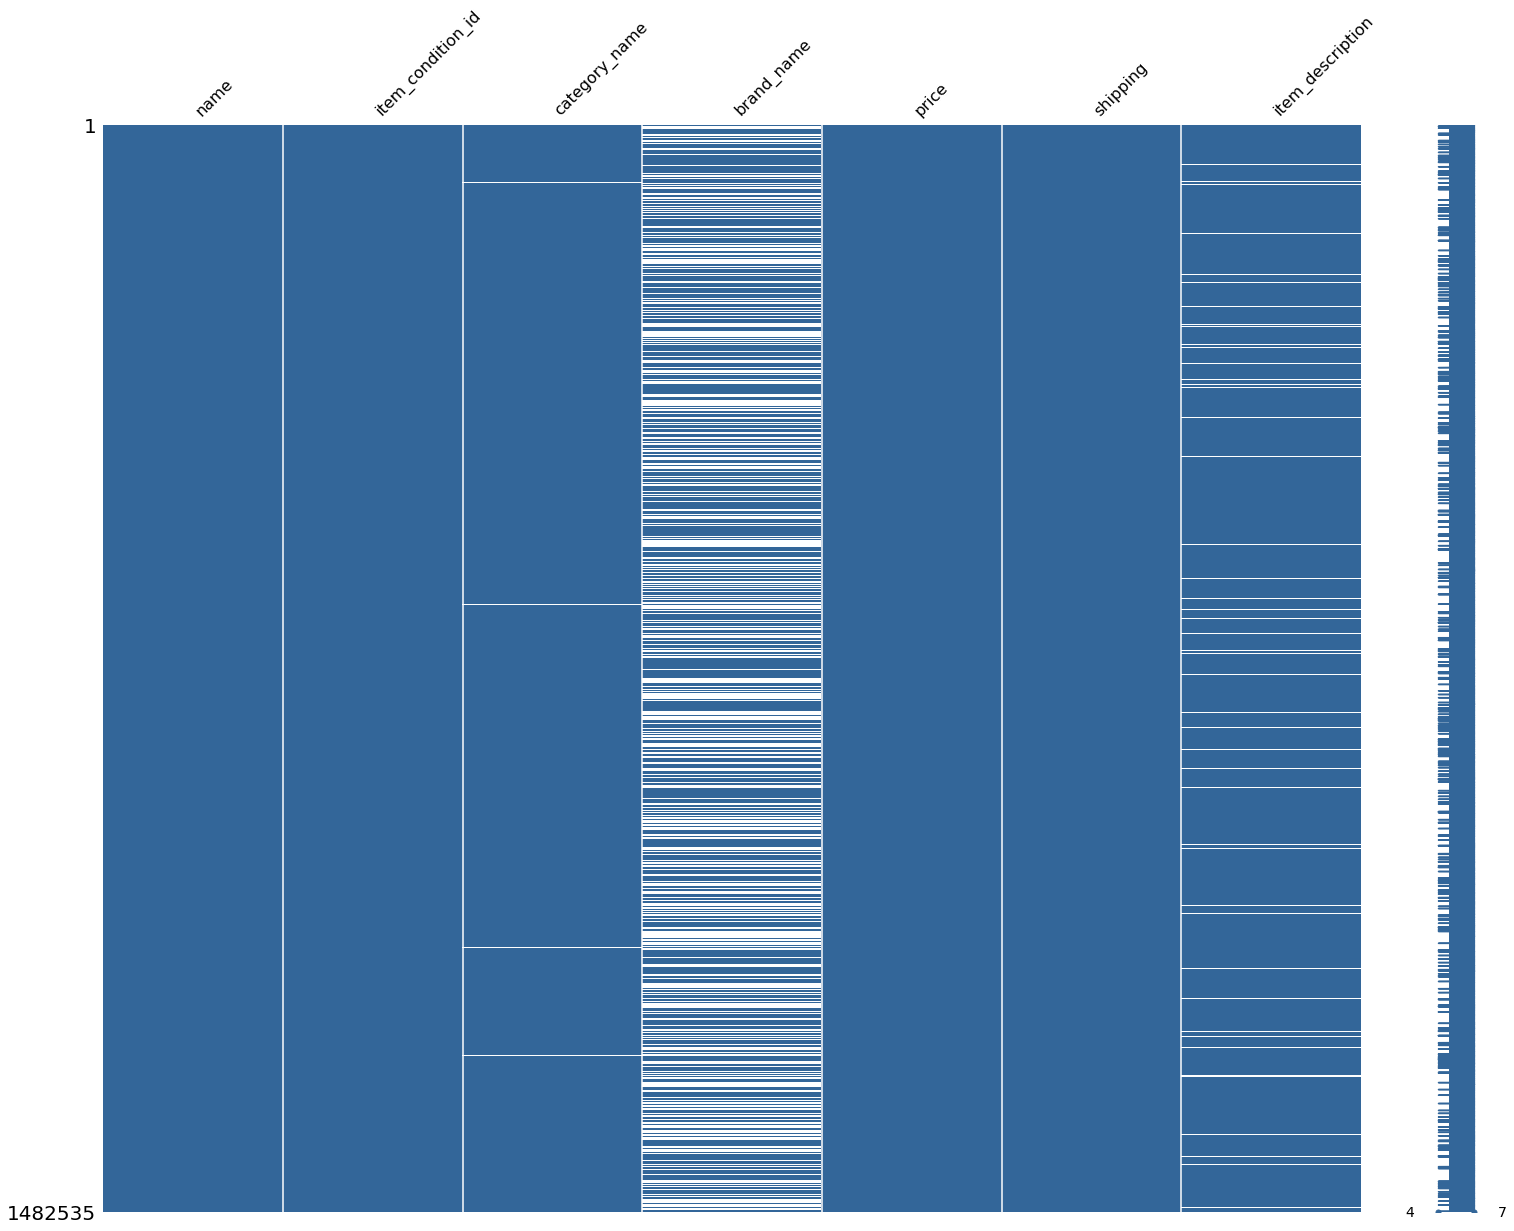

In [6]:
import missingno as msno
msno.matrix(df=df_train_copy.iloc[:,1:8], figsize=(25, 20), color=(0.2, 0.4, 0.6))

In [7]:
df_test_copy = df_test
df_test_copy = df_test.replace('No description yet', np.NaN)

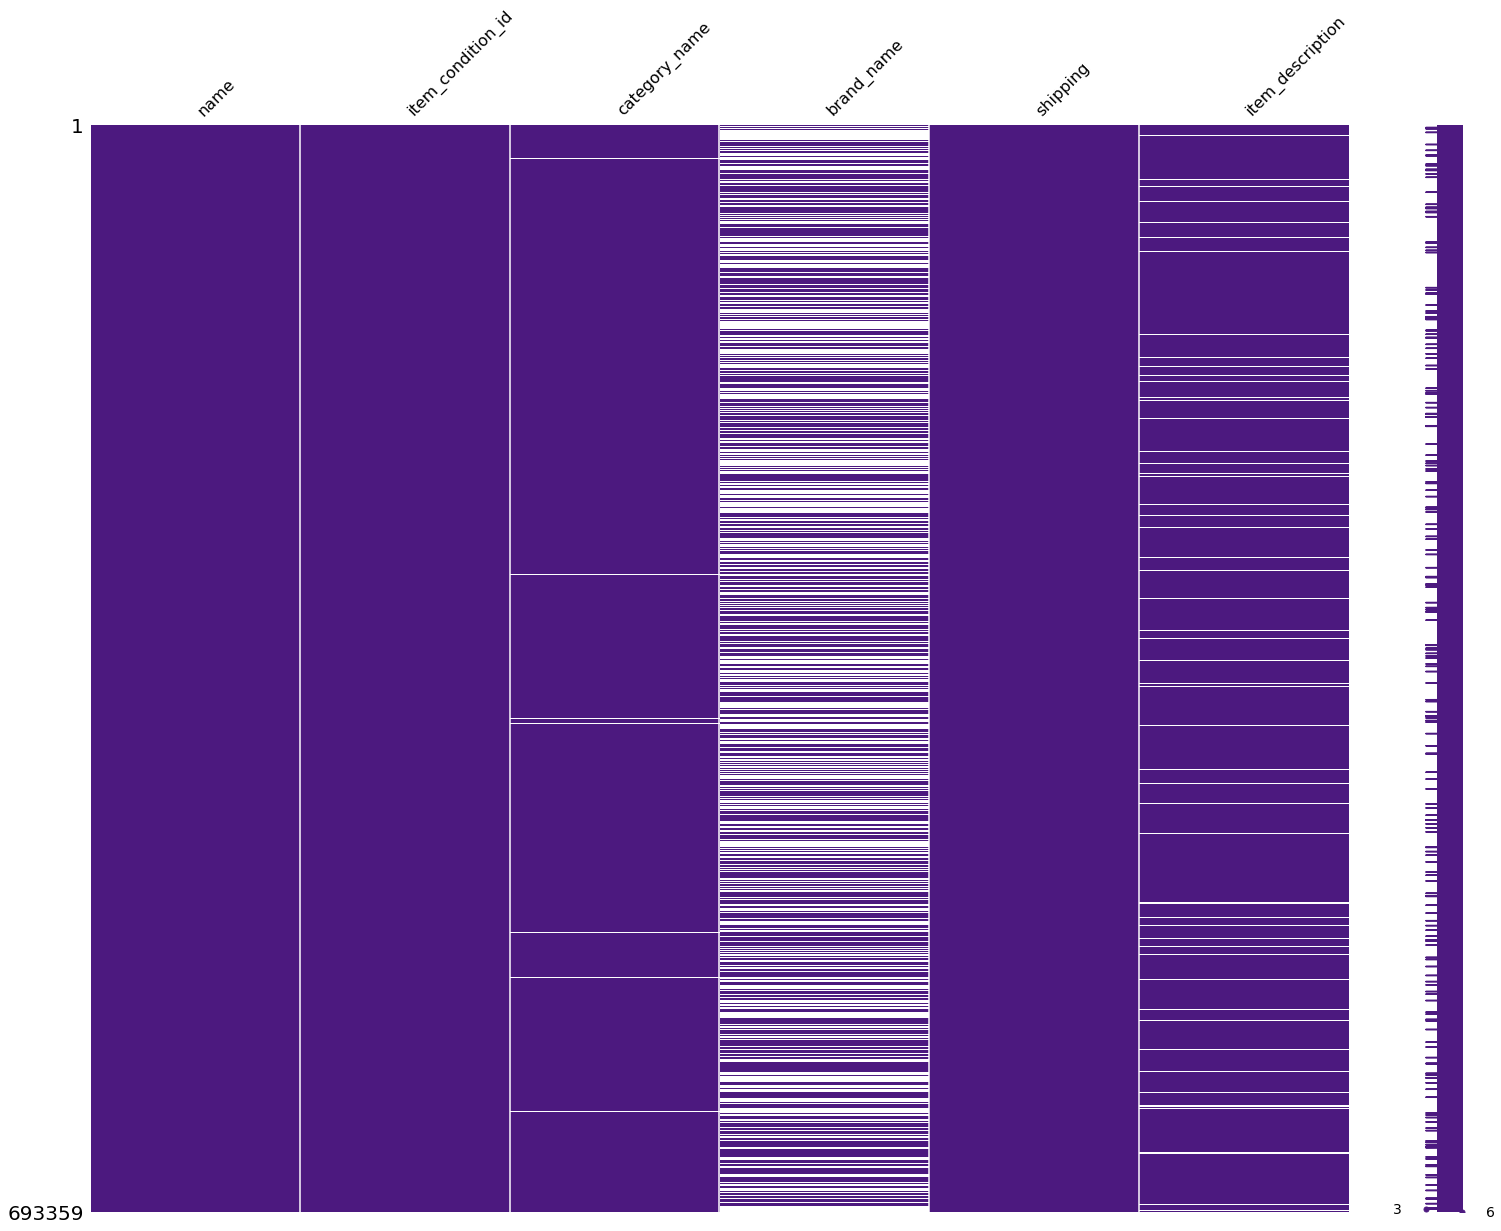

In [8]:
msno.matrix(df=df_test_copy.iloc[:,1:8], figsize=(25, 20), color=(0.3, 0.1, 0.5))

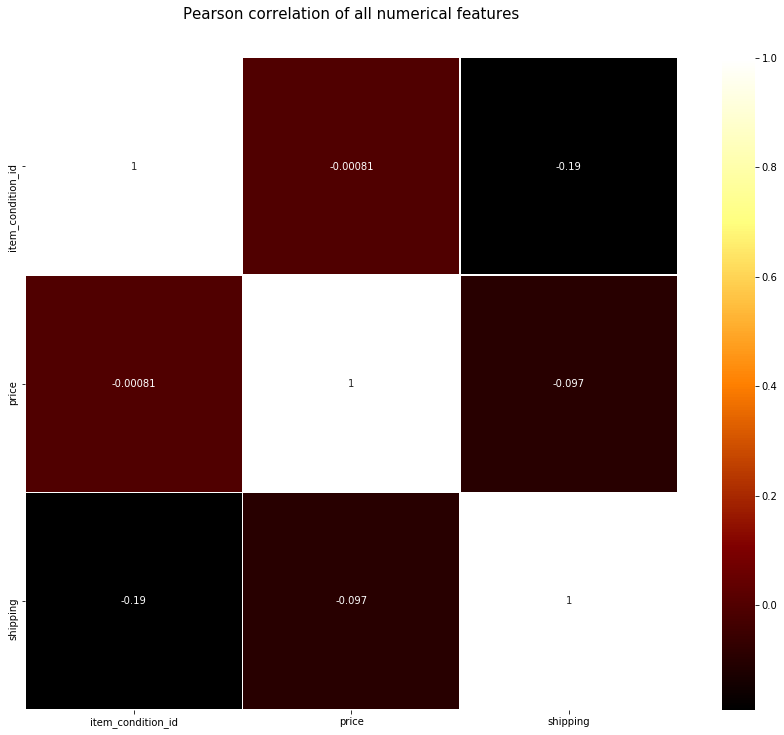

In [9]:
# draw correlatio map for all numerical variables, in train set
df_train_tmp = df_train.drop(['train_id'], axis = 1, inplace = False)
train_num = df_train_tmp.select_dtypes(include=['int64', 'float64'])
colormap = plt.cm.afmhot
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of all numerical features', y=1.05, size=15)
sns.heatmap(train_num.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
del df_train_tmp

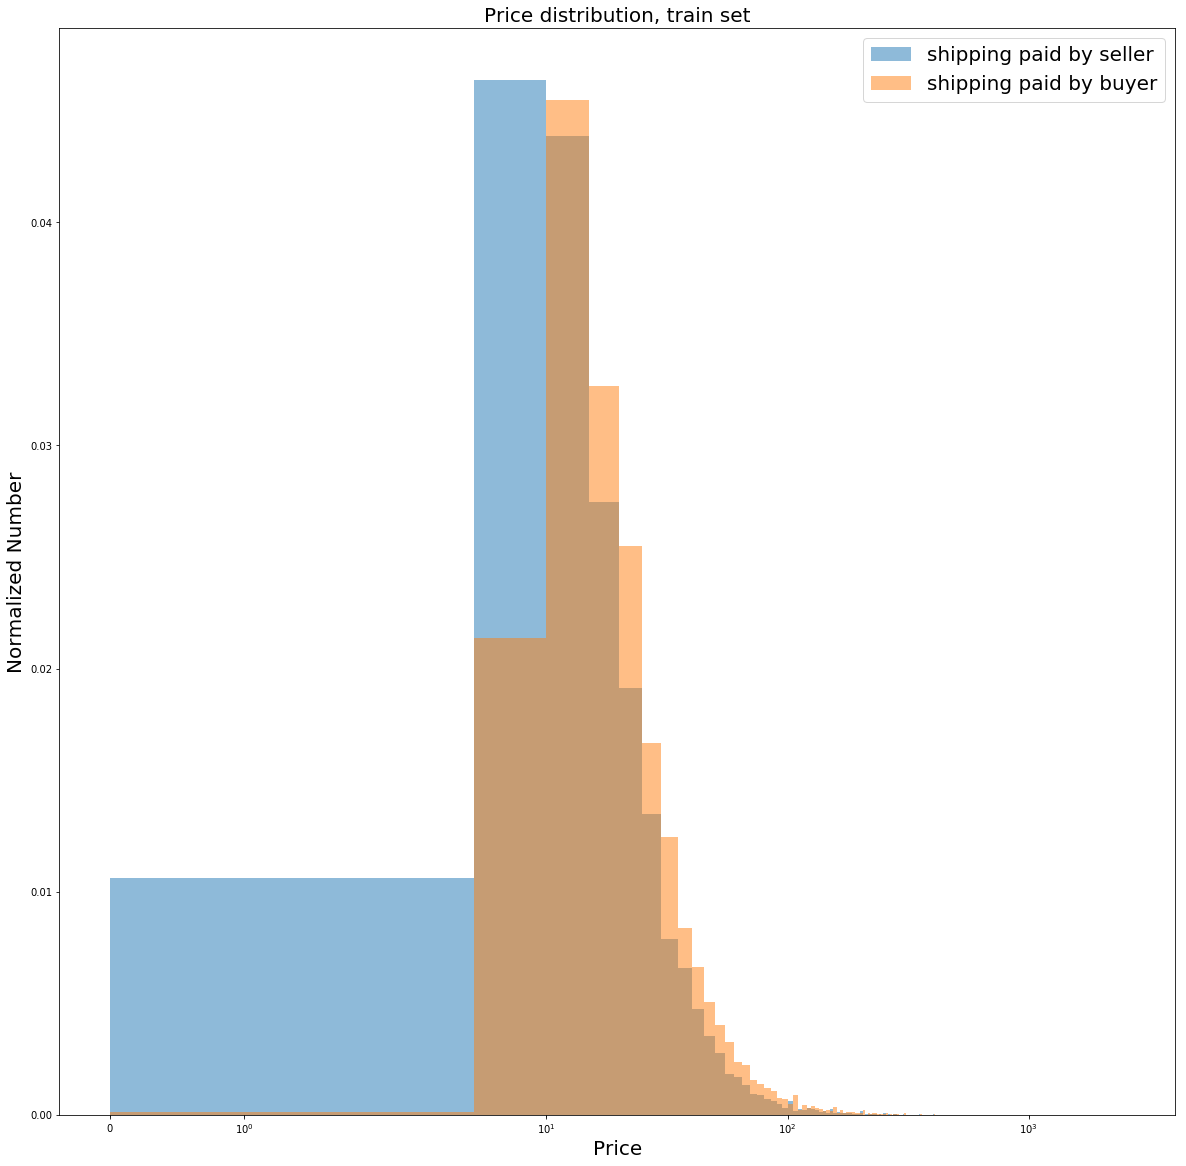

In [10]:
# plot shipping id vs price
plt.figure(figsize=(20, 20))
xmax = 2500
bins = xmax/5
plt.xscale('symlog')
#plt.yscale('log')
plt.hist(df_train[df_train['shipping']==1]['price'], int(bins), normed=True, range=[0, int(xmax)],
         alpha=0.5, label='shipping paid by seller')
plt.hist(df_train[df_train['shipping']==0]['price'], int(bins), normed=True, range=[0, int(xmax)],
         alpha=0.5, label='shipping paid by buyer')
plt.title('Price distribution, train set', fontsize=20)
plt.xlabel('Price', fontsize=20)
plt.ylabel('Normalized Number', fontsize=20)
plt.legend(fontsize=20)
plt.show()

/home/hua/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



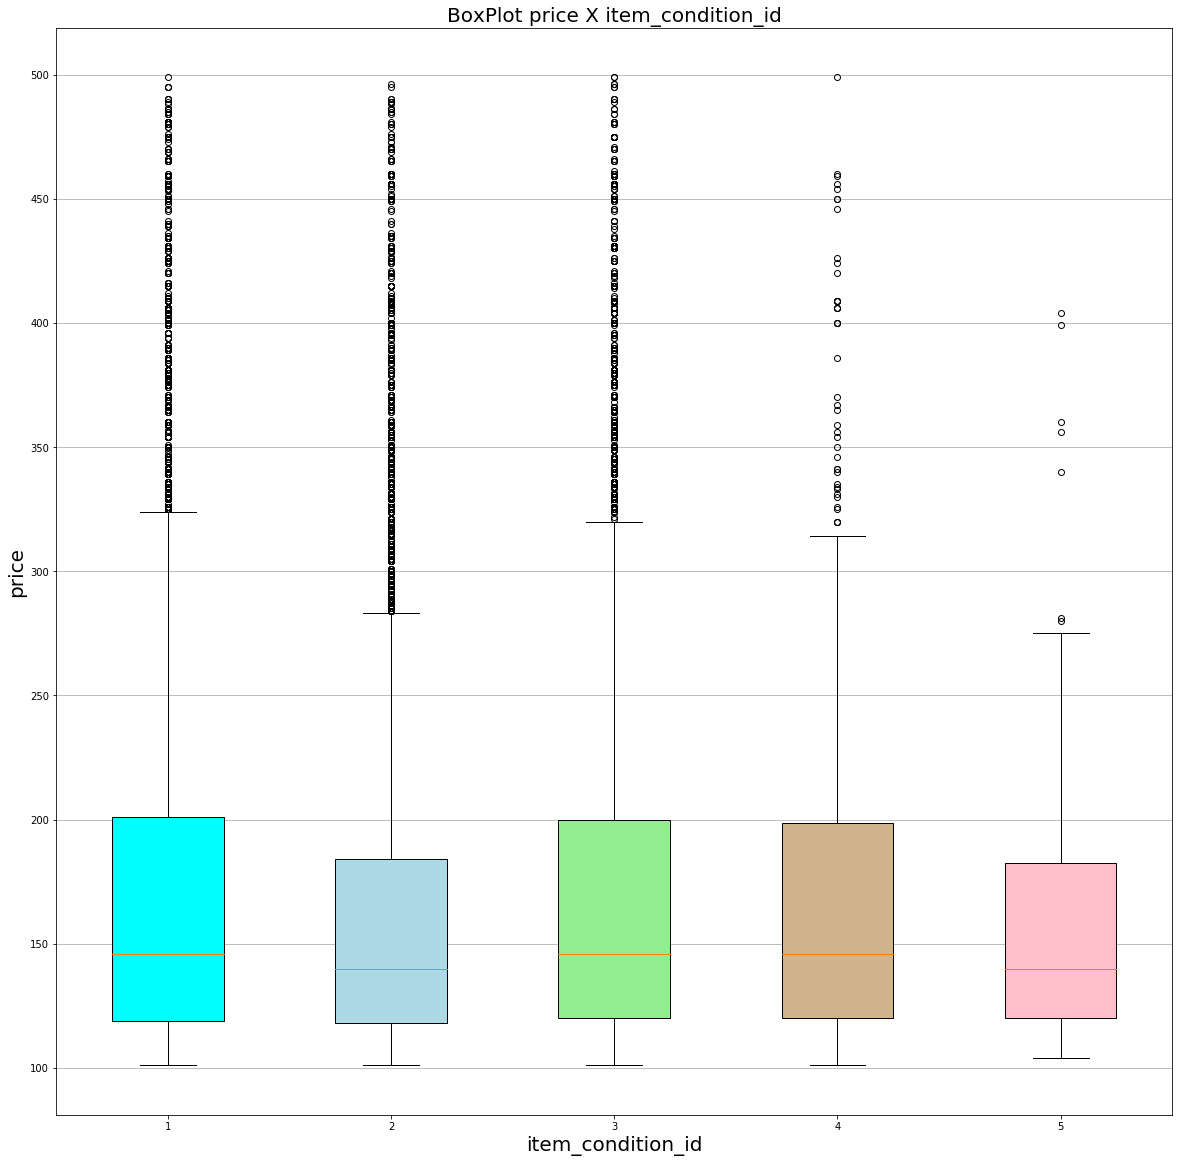

In [11]:
# plot price vs item condition
pricecut_lo = 100
pricecut_hi = 500
df_train_tmp = df_train[ (df_train['price'] > pricecut_lo) & (df_train['price'] < pricecut_hi) ]
my_plot = []
for i in df_train['item_condition_id'].unique():
    my_plot.append(df_train_tmp[df_train_tmp['item_condition_id']==i]['price'])

fig, axes = plt.subplots(figsize=(20, 20))
bp = axes.boxplot(my_plot,vert=True,patch_artist=True,labels=range(1,6)) 

colors = ['cyan', 'lightblue', 'lightgreen', 'tan', 'pink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes.yaxis.grid(True)

plt.title('BoxPlot price X item_condition_id', fontsize=20)
plt.xlabel('item_condition_id', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()
del df_train_tmp

(-0.5, 1499.5, 1499.5, -0.5)

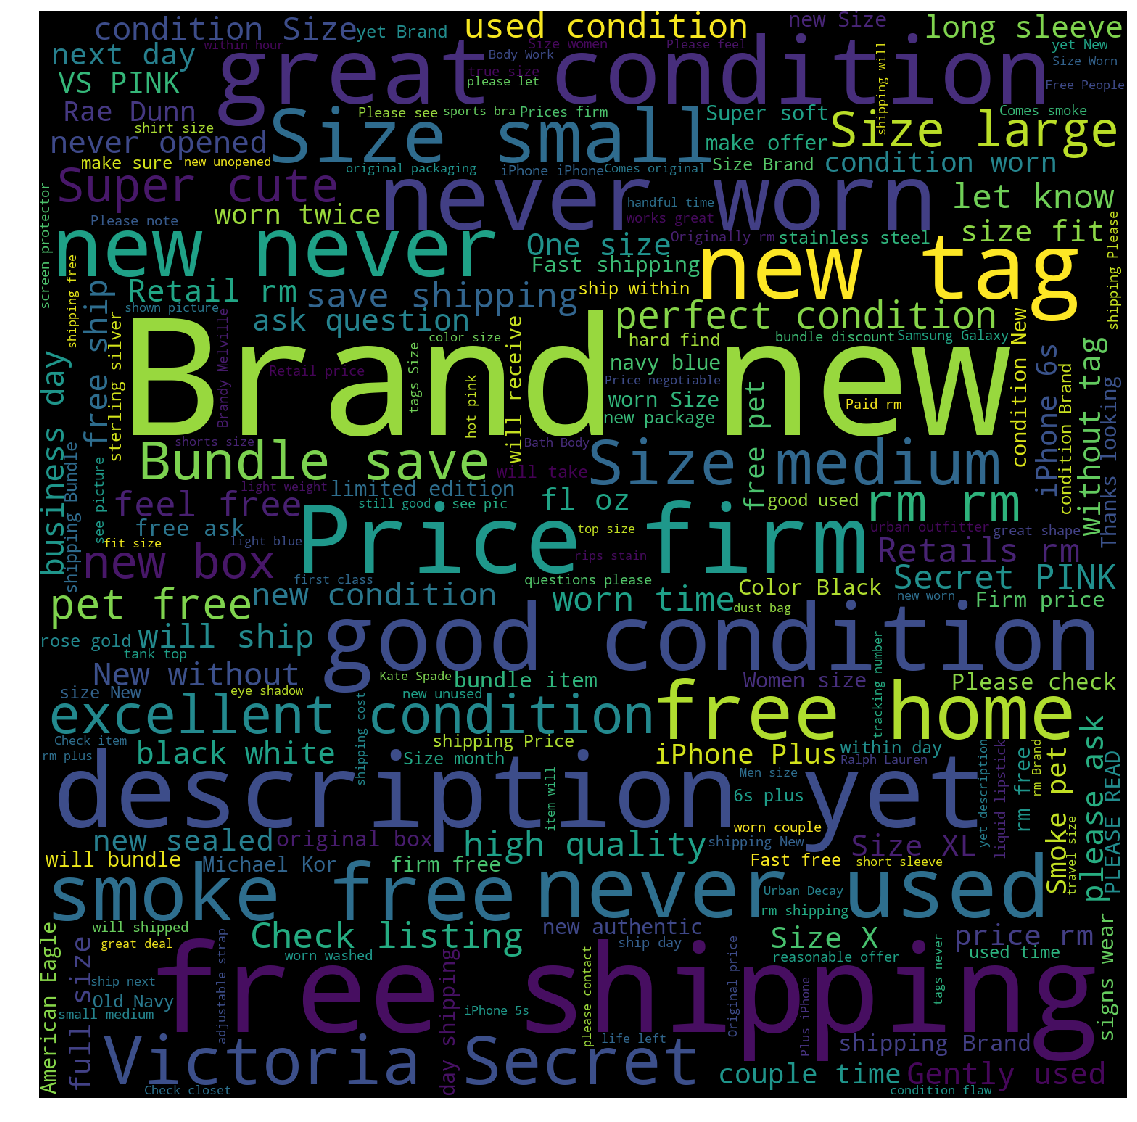

In [5]:
# ok, now we can look at text distribution
# first play with world cloud
from wordcloud import WordCloud
cloud = WordCloud(width=1500, height=1500).generate(" ".join(df_train['item_description'].astype(str)))
plt.figure(figsize=(20, 20))
plt.imshow(cloud)
plt.axis('off')